In [ ]:
import polars as pl
import numpy as np

In [ ]:
births = pl.read_csv('https://github.com/yardsale8/DSCI_210_R_notebooks/raw/main/data/NC_Birth.csv', null_values=['.'])

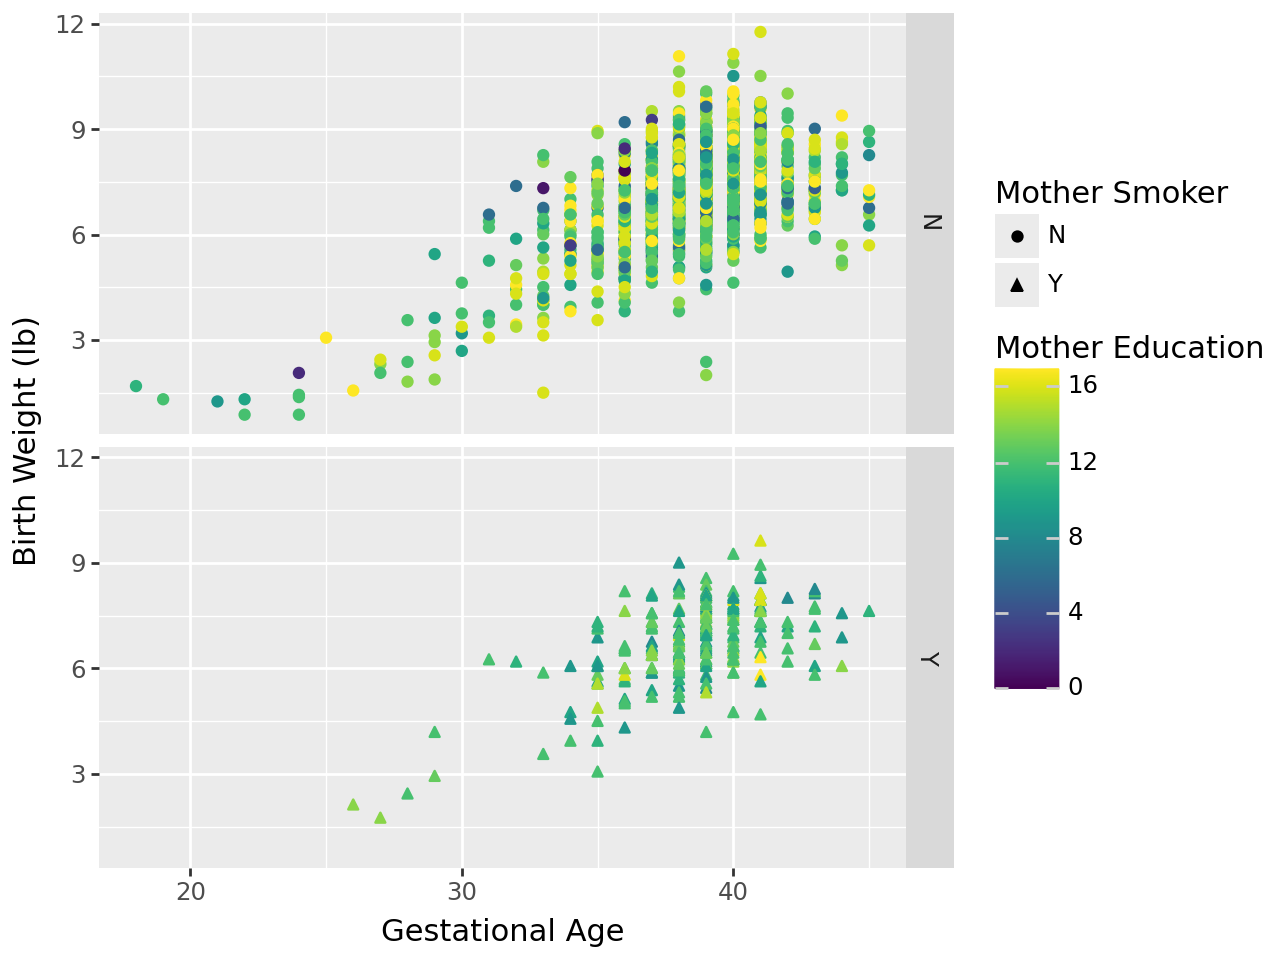

In [6]:
## Convert baby weight to lbs.

from plotnine import ggplot, geom_point, aes, facet_grid, labs
(ggplot(
        births
        .filter(pl.col("Mother Smoker").is_not_null())
        .with_columns(
            (pl.col("Birth Weight (Grams)") / 453.592)
            .alias("Birth Weight (lb)")
        )
    )
    + geom_point(
        aes(
            x="Gestational  Age",
            y="Birth Weight (lb)",
            shape="Mother Smoker",
            color="Mother Years of Education"
        )
    )
    + facet_grid(rows = "Mother Smoker")
    + labs(
        x="Gestational Age",
        y="Birth Weight (lb)",
        shape="Mother Smoker",
        color="Mother Education"
    )
)


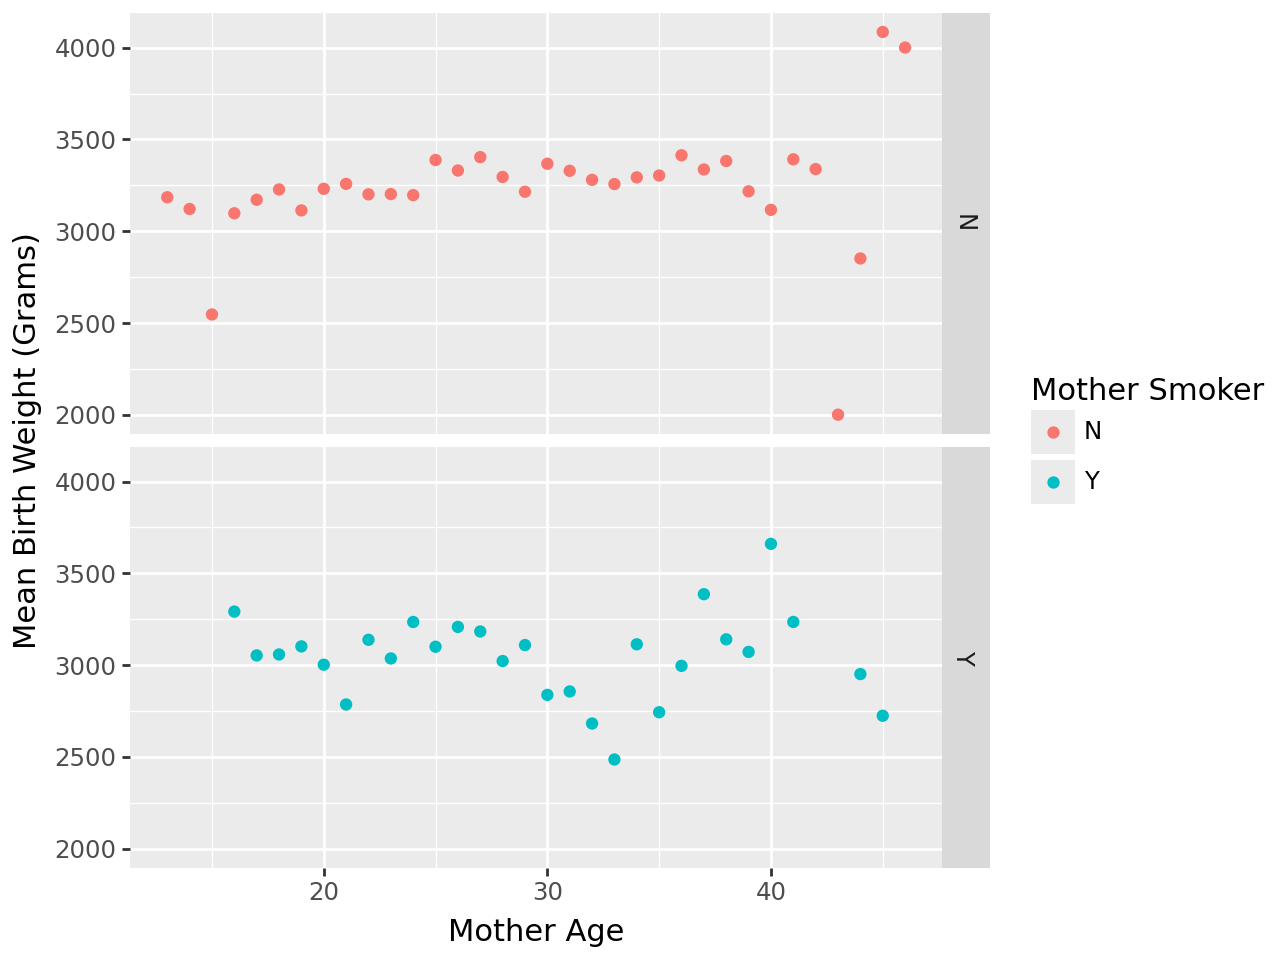

In [10]:
from plotnine import ggplot, geom_point, aes, facet_grid, labs

(
    ggplot(
        births
        .filter(pl.col("Mother Smoker").is_not_null())
        .group_by(["Mother Age", "Mother Smoker"])
        .agg(
            pl.col("Birth Weight (Grams)")
            .mean()
            .alias("Mean Birth Weight (Grams)")
        )
    )
    + geom_point(
        aes(
            x="Mother Age",
            y="Mean Birth Weight (Grams)",
            color="Mother Smoker"
        )
    )
    + facet_grid(rows = "Mother Smoker")
    + labs(
        x="Mother Age",
        y="Mean Birth Weight (Grams)"
    )
)


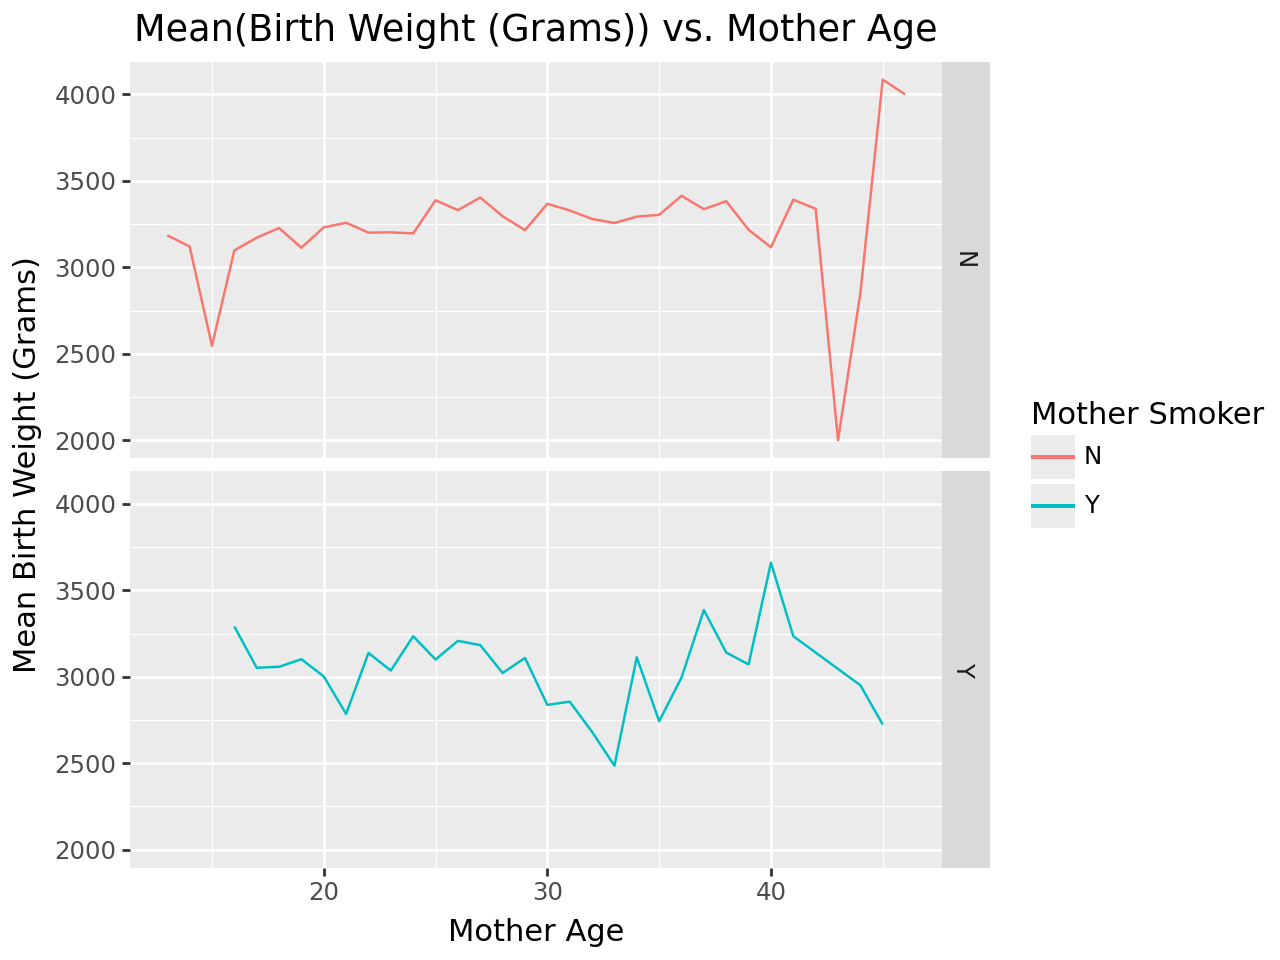

In [15]:
from plotnine import ggplot, geom_point, aes, facet_grid, labs, geom_line, ggtitle
(
    ggplot(
        births
        .filter(pl.col("Mother Smoker").is_not_null())
        .group_by(["Mother Age", "Mother Smoker"])
        .agg(
            pl.col("Birth Weight (Grams)")
            .mean()
            .alias("Mean Birth Weight (Grams)")
        )
    )
    + geom_line(
        aes(
            x="Mother Age",
            y="Mean Birth Weight (Grams)",
            color="Mother Smoker"
        )
    )
    + facet_grid(rows = "Mother Smoker")
    + ggtitle("Mean(Birth Weight (Grams)) vs. Mother Age")
    + labs(
        x="Mother Age",
        y="Mean Birth Weight (Grams)",
        color="Mother Smoker"
    )
)